In [1]:
import tensorflow as tf
import numpy as np
from helper_functions import create_samples
from helper_functions import plot_clusters
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# list all the parameters that will be used
n_features = 2
n_clusters = 3
n_samples_per_cluster = 500
seed = 700
embiggen_factor = 70

# use a predetermined seed
np.random.seed(seed)

In [3]:
# call the helper function to generate samples
centroids, samples = create_samples(n_clusters, n_samples_per_cluster, n_features, embiggen_factor,seed)

In [4]:
# initialize all global variables
init = tf.global_variables_initializer()

In [5]:
# run session
with tf.Session() as sess:
    sample_values = sess.run(samples)
    centroid_values = sess.run(centroids)
    

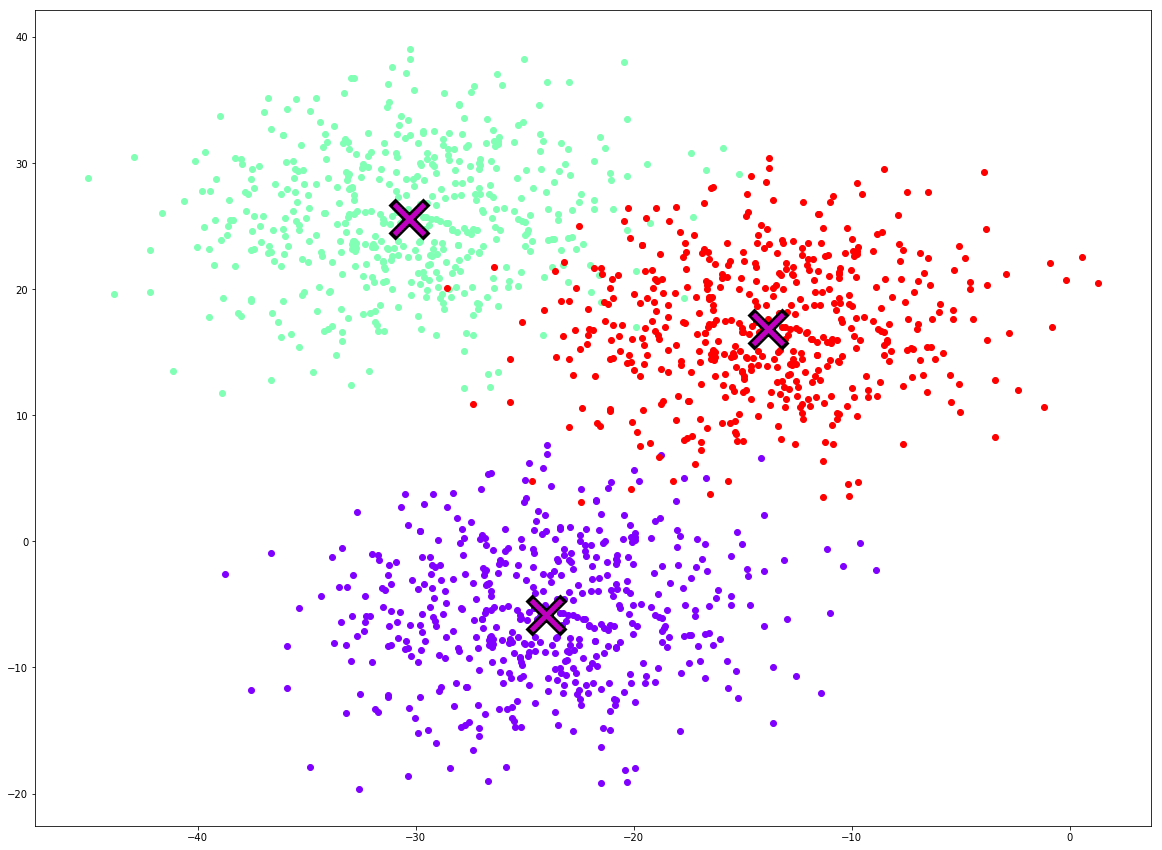

In [8]:
plot_clusters(sample_values, centroid_values, n_samples_per_cluster)

fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 20
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.show()